### ***Paso 3.1 (Conexión Drive)***

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### ***Paso 3.2 (Crear carpeta dataset)***

In [ ]:
!mkdir dataset

### ***Paso 3.3 (Crear carpetas de categorias)***

In [ ]:
!mkdir dataset/aceptable
!mkdir dataset/marchita_dia_1-4
!mkdir dataset/marchita_hace_mucho

### ***Paso 3.4 (Importar os y shutil)***

In [ ]:
import os
import shutil

### ***Paso 3.5 (Pasar archivos de Drive a Colab)***

In [ ]:
carpeta_fuente = '/content/drive/MyDrive/datasetmater/dataset_rrc/aceptable'
carpeta_destino = '/content/dataset/aceptable'

imagenes = os.listdir(carpeta_fuente)
for i, nombreimg in enumerate(imagenes):
   shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [ ]:
carpeta_fuente = '/content/drive/MyDrive/datasetmater/dataset_rrc/marchita_dia_1-4'
carpeta_destino = '/content/dataset/marchita_dia_1-4'

imagenes = os.listdir(carpeta_fuente)
for i, nombreimg in enumerate(imagenes):
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

In [ ]:
carpeta_fuente = '/content/drive/MyDrive/datasetmater/dataset_rrc/marchita_hace_mucho'
carpeta_destino = '/content/dataset/marchita_hace_mucho'

imagenes = os.listdir(carpeta_fuente)
for i, nombreimg in enumerate(imagenes):
    shutil.copy(carpeta_fuente + '/' + nombreimg, carpeta_destino + '/' + nombreimg)

### ***Paso 3.6 (Mostrar cantidad de imagenes por cada categoria)***

In [ ]:
!ls /content/dataset/aceptable | wc -l

1485


In [ ]:
!ls /content/dataset/marchita_dia_1-4 | wc -l

1485


In [ ]:
!ls /content/dataset/marchita_hace_mucho | wc -l

495


### ***Paso 3.7 (Importar tensorflow.keras, numpy y matplotlib)***

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

### ***Paso 3.8 (Crear generador del dataset y probar con imagenes aleatorias)***

Found 2772 images belonging to 3 classes.
Found 693 images belonging to 3 classes.


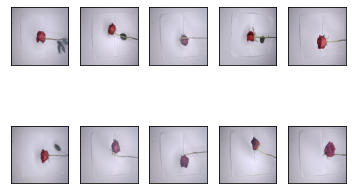

In [ ]:
#Paso 3.8.1
datagen = ImageDataGenerator(
    rescale=1. / 255,
    validation_split=0.2
)

#Paso 3.8.2
data_gen_entrenamiento = datagen.flow_from_directory('/content/dataset', target_size=(224,224),batch_size=32, shuffle=True, subset='training')
data_gen_pruebas = datagen.flow_from_directory('/content/dataset', target_size=(224,224),batch_size=32, shuffle=True, subset='validation')

#Paso 3.8.3
for imagen, etiqueta in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(imagen[i])
  break
plt.show()

### ***Paso 3.9 (importar tensorflow, tensorflow_hub y el modelo preentrenado)***

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub

url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
mobilenetv2 = hub.KerasLayer(url, input_shape=(224,224,3))

### ***Paso 3.10 (Congelar modelo preentrenado)***

In [ ]:
mobilenetv2.trainable = False

### ***Paso 3.11 (Definir modelo y asignar cantidad de categorias)***

In [ ]:
modelo = tf.keras.Sequential([
    mobilenetv2,
    tf.keras.layers.Dense(3, activation='softmax')
])

### ***Paso 3.12 (Saber con cuantos  parametros se hara el entrenamiento)***

In [ ]:
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 3)                 3843      
                                                                 
Total params: 2,261,827
Trainable params: 3,843
Non-trainable params: 2,257,984
_________________________________________________________________


### ***Paso 3.13 (Compilar modelo)***

In [ ]:
modelo.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

### ***Paso 3.14 (Entrenamiento)***

In [ ]:
EPOCAS = 60

historial = modelo.fit(
    data_gen_entrenamiento, epochs=EPOCAS, batch_size=32,
    validation_data=data_gen_pruebas
)

Epoch 1/60
87/87 [==============================] - 33s 382ms/step - loss: 3.9826e-04 - accuracy: 1.0000 - val_loss: 1.2902 - val_accuracy: 0.7994
Epoch 2/60
87/87 [==============================] - 33s 381ms/step - loss: 3.9846e-04 - accuracy: 1.0000 - val_loss: 1.1705 - val_accuracy: 0.8153
Epoch 3/60
87/87 [==============================] - 33s 379ms/step - loss: 3.6505e-04 - accuracy: 1.0000 - val_loss: 1.3258 - val_accuracy: 0.7980
Epoch 4/60
87/87 [==============================] - 33s 381ms/step - loss: 3.6881e-04 - accuracy: 1.0000 - val_loss: 1.2118 - val_accuracy: 0.8139
Epoch 5/60
87/87 [==============================] - 33s 382ms/step - loss: 3.4027e-04 - accuracy: 1.0000 - val_loss: 1.2669 - val_accuracy: 0.8110
Epoch 6/60
87/87 [==============================] - 33s 379ms/step - loss: 3.2364e-04 - accuracy: 1.0000 - val_loss: 1.2776 - val_accuracy: 0.8110
Epoch 7/60
87/87 [==============================] - 33s 378ms/step - loss: 3.1093e-04 - accuracy: 1.0000 - val_loss: 1

In [ ]:
#Entrenar el modelo
EPOCAS = 20

historial = modelo.fit(
    data_gen_entrenamiento, epochs=EPOCAS, batch_size=32,
    validation_data=data_gen_pruebas
)

Epoch 1/20
87/87 [==============================] - 107s 1s/step - loss: 0.0171 - accuracy: 0.9996 - val_loss: 0.5510 - val_accuracy: 0.8427
Epoch 2/20
87/87 [==============================] - 106s 1s/step - loss: 0.0158 - accuracy: 0.9996 - val_loss: 0.6709 - val_accuracy: 0.8182
Epoch 3/20
87/87 [==============================] - 107s 1s/step - loss: 0.0135 - accuracy: 0.9996 - val_loss: 0.6819 - val_accuracy: 0.8211
Epoch 4/20
87/87 [==============================] - 106s 1s/step - loss: 0.0123 - accuracy: 0.9996 - val_loss: 0.6174 - val_accuracy: 0.8355
Epoch 5/20
87/87 [==============================] - 107s 1s/step - loss: 0.0111 - accuracy: 0.9996 - val_loss: 0.7940 - val_accuracy: 0.7980
Epoch 6/20
87/87 [==============================] - 106s 1s/step - loss: 0.0104 - accuracy: 1.0000 - val_loss: 0.6685 - val_accuracy: 0.8312
Epoch 7/20
87/87 [==============================] - 107s 1s/step - loss: 0.0093 - accuracy: 1.0000 - val_loss: 0.6344 - val_accuracy: 0.8341
Epoch 8/20
87

In [ ]:
#Entrenar el modelo
EPOCAS = 5

historial = modelo.fit(
    data_gen_entrenamiento, epochs=EPOCAS, batch_size=32,
    validation_data=data_gen_pruebas
)

Epoch 1/5
87/87 [==============================] - 107s 1s/step - loss: 0.0034 - accuracy: 1.0000 - val_loss: 0.7744 - val_accuracy: 0.8297
Epoch 2/5
87/87 [==============================] - 127s 1s/step - loss: 0.0032 - accuracy: 1.0000 - val_loss: 0.8391 - val_accuracy: 0.8225
Epoch 3/5
87/87 [==============================] - 106s 1s/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.8355 - val_accuracy: 0.8225
Epoch 4/5
87/87 [==============================] - 105s 1s/step - loss: 0.0029 - accuracy: 1.0000 - val_loss: 0.8574 - val_accuracy: 0.8211
Epoch 5/5
87/87 [==============================] - 104s 1s/step - loss: 0.0028 - accuracy: 1.0000 - val_loss: 0.8686 - val_accuracy: 0.8211


### ***Paso 3.15 (Graficas de entrenamiento)***

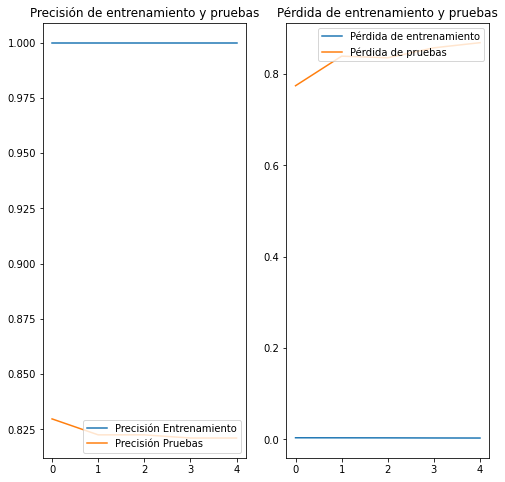

In [ ]:
#Graficar la presición
acc = historial.history['accuracy']
val_acc = historial.history['val_accuracy']

loss = historial.history['loss']
val_loss = historial.history['val_loss']

rango_epocas = range(5)

plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(rango_epocas, acc, label='Precisión Entrenamiento')
plt.plot(rango_epocas, val_acc, label='Precisión Pruebas')
plt.legend(loc='lower right')
plt.title('Precisión de entrenamiento y pruebas')

plt.subplot(1,2,2)
plt.plot(rango_epocas, loss, label='Pérdida de entrenamiento')
plt.plot(rango_epocas, val_loss, label='Pérdida de pruebas')
plt.legend(loc='upper right')
plt.title('Pérdida de entrenamiento y pruebas')
plt.show()

### ***Paso 3.16 (Guardar modelo)***

In [ ]:
from keras.models import load_model
modelo.save('model_Rosas.h5')

### ***Paso 3.17 y Simulaciones***

In [ ]:
#Categorizar una imagen de internet
from PIL import Image
import requests
from io import BytesIO
import cv2

def categorizar(url):
  respuesta = requests.get(url)
  img = Image.open(BytesIO(respuesta.content))
  img = np.array(img).astype(float)/255

  img = cv2.resize(img, (224,224))
  prediccion = modelo.predict(img.reshape(-1, 224, 224, 3))
  return np.argmax(prediccion[0], axis=-1)

In [ ]:
#Simulacion 1
#0 = aceptable, 1 = marchita_dia_1-4, 2 = marchita_hace_mucho

url = 'https://i.ibb.co/b1tZjtN/Imagen-Prueba-1.jpg'
prediccion = categorizar (url)
print(prediccion)

if prediccion == 0:
  print("aceptable")
elif prediccion == 1:
  print("marchita entre 1 a 4 dias")
else:
  print("marchita hace mucho")



0
aceptable


In [ ]:
#Simulacion 2
#0 = aceptable, 1 = marchita_dia_1-4, 2 = marchita_hace_mucho

url = 'https://i.ibb.co/YXMjBVB/Imagen-Prueba-2.jpg'
prediccion = categorizar (url)
print(prediccion)

if prediccion == 0:
  print("aceptable")
elif prediccion == 1:
  print("marchita entre 1 a 4 dias")
else:
  print("marchita hace mucho")

0
aceptable


In [ ]:
#Simulacion 3
#0 = aceptable, 1 = marchita_dia_1-4, 2 = marchita_hace_mucho

url = 'https://i.ibb.co/tLQCJyQ/Imagen-Prueba-3.jpg'
prediccion = categorizar (url)
print(prediccion)

if prediccion == 0:
  print("aceptable")
elif prediccion == 1:
  print("marchita entre 1 a 4 dias")
else:
  print("marchita hace mucho")

1
marchita entre 1 a 4 dias


In [ ]:
#Simulacion 4
#0 = aceptable, 1 = marchita_dia_1-4, 2 = marchita_hace_mucho

url = 'https://i.ibb.co/kXz7gYW/Imagen-Prueba-4.jpg'
prediccion = categorizar (url)
print(prediccion)

if prediccion == 0:
  print("aceptable")
elif prediccion == 1:
  print("marchita entre 1 a 4 dias")
else:
  print("marchita hace mucho")

1
marchita entre 1 a 4 dias


In [ ]:
#Simulacion 5
#0 = aceptable, 1 = marchita_dia_1-4, 2 = marchita_hace_mucho

url = 'https://i.ibb.co/njyJd9J/Imagen-Prueba-5.jpg'
prediccion = categorizar (url)
print(prediccion)

if prediccion == 0:
  print("aceptable")
elif prediccion == 1:
  print("marchita entre 1 a 4 dias")
else:
  print("marchita hace mucho")

1
marchita entre 1 a 4 dias


In [ ]:
#Simulacion 6
#0 = aceptable, 1 = marchita_dia_1-4, 2 = marchita_hace_mucho

url = 'https://i.ibb.co/jJqGhtN/Imagen-Prueba-6.jpg'
prediccion = categorizar (url)
print(prediccion)

if prediccion == 0:
  print("aceptable")
elif prediccion == 1:
  print("marchita entre 1 a 4 dias")
else:
  print("marchita hace mucho")

2
marchita hace mucho


### ***Cargar y Guardar el modelo***

In [ ]:
MODEL_PATH = 'model_Rosas__16_epo_60_2.h5'
model = tf.keras.models.load_model((MODEL_PATH),custom_objects={'KerasLayer':hub.KerasLayer})

In [ ]:
#Crear la carpeta para exportarla a TF Serving
!mkdir -p carpeta_salida/modelo_rosas/16_60_2

In [ ]:
#Guardar el modelo en formato SavedModel
modelo.save('carpeta_salida/modelo_rosas/16_60_2')

In [ ]:
#Hacerlo un zip para bajarlo y usarlo en otro lado
!zip -r modelo_rosas_v16_60_2.zip /content/carpeta_salida/modelo_rosas/

In [ ]:
import zipfile
import os
import shutil
with zipfile.ZipFile("modelo_rosas_3.zip","r") as f:
  f.extractall('.')


In [ ]:
from keras.models import load_model
modelo = load_model("model_Rosas_16_3.h5")

In [ ]:
from keras.models import load_model
modelo.save('model_Rosas__16_epo_60_2.h5')